# Project: Investigate TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For my project, I will be using TMDb Dataset\
>TMDb Dataset has 10k+ rows and 21 columns.

>**A.General Questions**
>>1. Least & Most Profitable Movie?
>>2. Profit Trends from year to year?
>>3. Avg Runtime of movies over the years?
>>4. Which movie had the greatest and least budget?
>>5. Top 3 Cheapest and Expensive profitable movies?

>**B.What are the similar characteristics does the most profitable movie have?**
>>* Budget
>>* Cast
>>* Director
>>* Runtime
>>* Genres
>>* Production Companies
>>* Revenue

In [38]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [39]:
# Loading the dataset
df = pd.read_csv('tmdb-movies.csv')

# Glimpse on top 5 rows of dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [40]:
# Scanning the dataframe for incorrect datatypes and missing Values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [41]:
# Scanning the Dataframe for Null Values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [42]:
# Scanning the dataframe for duplicate values
df.duplicated().any()

True

In [43]:
df.shape

(10866, 21)

In [44]:
# Searching for 0's in dataframe
y = df.query('budget == 0').shape
print('Number of Rows with "0" value in budget column : {}'.format(y[0]))

Number of Rows with "0" value in budget column : 5696


In [45]:
# Searching for 0's in dataframe
y = df.query('revenue == 0').shape
print('Number of Rows with "0" value in revenue column : {}'.format(y[0]))

Number of Rows with "0" value in revenue column : 6016


In [46]:
# Searching for 0's in dataframe
y = df.query('runtime == 0').shape
print('Number of Rows with "0" value in runtime column : {}'.format(y[0]))

Number of Rows with "0" value in runtime column : 31


### Data Cleaning

**Problems With the Dataframe**
>**1. Unnecessary Columns:** Some of the columns are not required for my Analysis.So, removing those columns would be a viable option.Those columns are `id`,`imdb_id`,`popularity`,`homepage`,`keywords`,`overview`,`tagline`,`budget_adj`,`revenue_adj`.\
>**2. Zeros are needed to convert into null values:** `budget` column has `5696` row with zero values,`revenue` column has `6016` row with zero values,`runtime` column has `31` row with zero values,\
>**3. Drop Null Values:**: Droping the null value rows as they may lead to inappropriate results.\
>**4. Duplicate Rows:** Droping the duplicate rows.\
>**5. Remodelling the Data-types:** Some of the columns like `release_date` has incorrect data-type,hence needed to change.\
>**6. Renaming the columns:** The Columns like `budget`,`revenue` are not specified with the units.

**1. Removing Unnecessary Columns:**

In [47]:
#Selecting the columns needed to drop
col_del = ['id','imdb_id','popularity','homepage','keywords','overview','tagline','budget_adj','revenue_adj']

# Droping the columns
df.drop(col_del,axis = 1,inplace = True)

# Checking the columns
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

**2. Converting all zeros into null values**

In [48]:
# Selecting the columns
col_del = ['budget','revenue','runtime']

# Replacing the values
df[col_del] = df[col_del].replace(to_replace = 0,value = np.NaN)

# Checking for any 0's
df.query('budget == 0' or 'revenue == 0' or 'runtime == 0')

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


**3. Drop the Null Values**

In [49]:
# Droping the Null Values for the selected columns
df.dropna(subset = col_del,inplace = True)

# Droping the Null Values for all the columns
df.dropna(inplace = True)

# Checking for any Null Values
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

**4. Duplicate Rows**

In [50]:
# Droping the Duplicate Rows
df.drop_duplicates(inplace = True)

# Checking for any Duplicate rows
df.duplicated().any()

False

**5. Remodelling the Datatype of Column**

In [51]:
# Changing the Datatype
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)

# Checking the status
df.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


**6.Renaming the columns**

In [52]:
# Renaming the columns
df.rename(columns = {'budget' : 'budget(in $)','revenue' : 'revenue(in $)'},inplace = True)

# Checking the columns
df.head(0)

,budget(in $),revenue(in $),original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [54]:
# Getting Shape of dataframe
y = df.shape
print("Total No of Row :{}\nTotal No of Columns:{}".format(y[0],y[1]))

Total No of Row :3805
Total No of Columns:12


Our Cleanning process has been *completed*.\
We can see, Before We've Total `10866 rows` and `21 columns`\
And Now,After Cleaning the data,\
Now We've Total No of `Rows:3805` and `Columns:12`

<a id='eda'></a>
## Exploratory Data Analysis

Before starting our EDA I will like to add one more columns i.e `profit` which is one of the major column for answering the questions.

In [59]:
# Inserting the new column 'Profit'
df.insert(2,'profit',df['revenue(in $)'] - df['budget(in $)'])

# Checking the columns
df.head(0)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


### A. General Questions

>#### A1. Which is the Least and Most Profitable Movie?

In [87]:
# Function for Easy Code
def high_low(col):
    
    #taking the index value of the highest number in profit column
    high_id = df[col].idxmax()
    #calling by index number,storing that row info to a variable
    high = pd.DataFrame(df.loc[high_id])
    
    #taking the index value of the least number in profit column
    low_id = df[col].idxmin()
    #calling by index number,storing that row info to a variable
    low = pd.DataFrame(df.loc[low_id])
    
    #concatenating two dataframes
    res = pd.concat([high,low],axis = 1)
    
    return res

In [88]:
# Calling the function
high_low('profit')

,1386,2244
budget(in $),237000000,425000000
revenue(in $),-2147483648,11087569
profit,1910483648,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The Above cell shows the movies with **Highest profit** and **Highest loss**

According to this Dataset,

The first column has the highest profit (i.e `$2.5B`), directed by `James Cameron, Avatar`\
And the second column his the highest loss (i.e `$410M`) ,directed by `Sngmoo Lee, The Warrior's Way`.\

(**Note:** The Negative Sign in the second column indicates the `loss`.) 

>#### A2. Profit trends from year to year

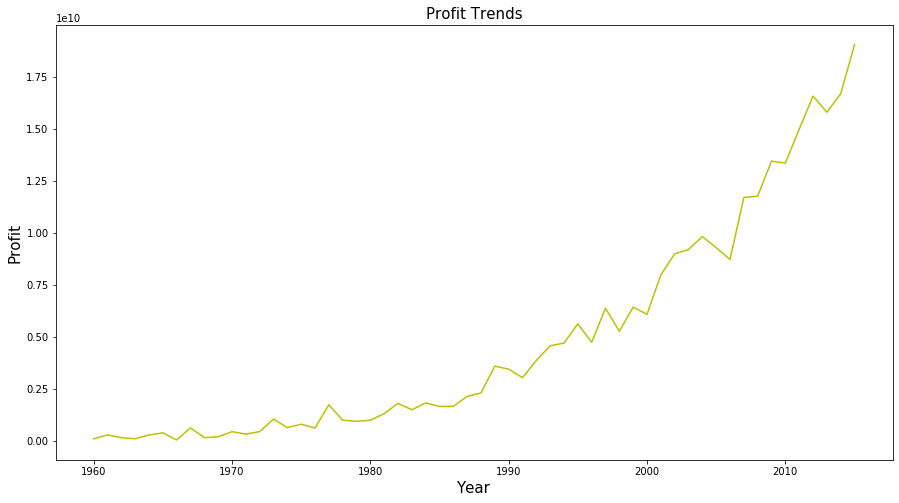

In [90]:
# Using the groupby function, calculating the sum and plotting the results
df.groupby('release_year')['profit'].sum().plot(kind = 'line',figsize = (15,8),color = 'y')
plt.title('Profit Trends',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Profit',fontsize = 15);

From this line Graph,we can say that the profit has increased over the year exponentially.

>#### A3. Average Runtime of Movie Over the Years?

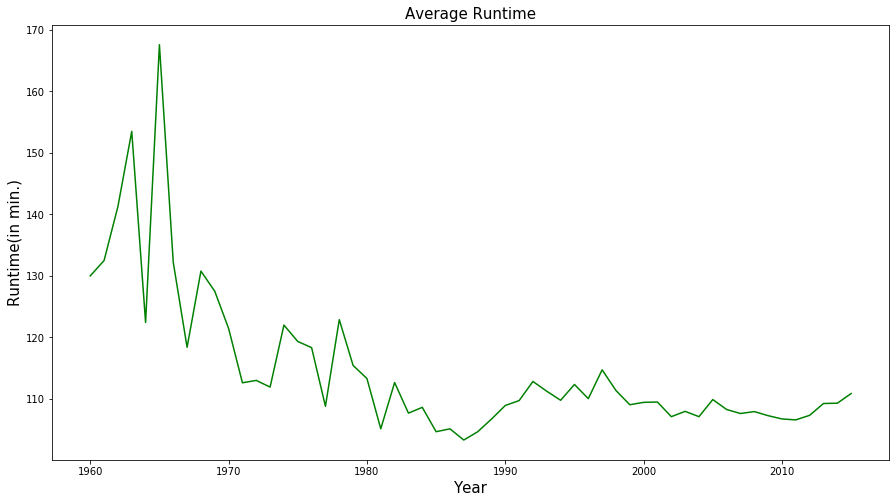

In [62]:
# Using the groupby function,calculating the mean() and plotting the results
df.groupby('release_year')['runtime'].mean().plot(kind = 'line',figsize = (15,8),color = 'g')
plt.title('Average Runtime',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Runtime(in min.)',fontsize = 15);

From the above graph,we can conclud that the runtime of has decreased over the year, \
As We can see it was at the peak at `1960's` i.e(**120-125 min.**)\
And it is lowest at `present` around **100-110 min.**

>#### A4. Which Movie has the Greatest And Least Budget?

In [91]:
# Calling the function
high_low('budget(in $)')

,2244,2618
budget(in $),425000000,1
revenue(in $),11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


The Above cell shows the movies with **Greatest Budget** and **Least Budget**

According to this Dataset,

The first column has the Greatest Budget Movie(i.e `$425M`), directed by `Sngmoo Lee, The Warrior's Way`\
it's the same movie with Highest Loss.\
And the second column his the Least Budget Movie (i.e `$1`) ,directed by `Jeff Pollack`.

>#### A5.Top 3 Cheapest and Expensive Profitable Movies
>> A5(I). Top 3 Expensive Profitabel Movies:

let's select movies with profit higher than `$50M`

In [65]:
def Cheap_exp_profit(val):
    return df.query('profit > 50000000').sort_values('budget(in $)',ascending = val).head(3)

In the above function, `val` is a variable which is used to define ascending order for the result.

In [66]:
Cheap_exp_profit(False)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3375,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011
7387,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007
14,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015


>>A5(II). Top 3 Cheapest Profitable Movies:

In [68]:
Cheap_exp_profit(True)

,budget(in $),revenue(in $),profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10495,113,115103979,115103866,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986
7447,15000,193355800,193340800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86.0,Horror|Mystery,Blumhouse Productions|Solana Films,2007-09-14,714,6.1,2007
2449,25000,248000000,247975000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81.0,Horror|Mystery,Artisan Entertainment|Haxan Films,1999-07-14,522,6.3,1999


### B. What are the similar characteristics does the most profitable movie have?

Let's select only those movies whose profit is Greater or Equal than `$50M`

In [92]:
# Function for Easy Code
def avg(col):
    
    #Calculating the mean and returning the result
    return df.query('profit > 50000000')[col].mean()

In [93]:
# Function for Easy Code
def value(col):
    # Convert column to string and seperate it by '|'
    data = df.query('profit > 50000000')[col].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    
    # Counting the data and arraging in descending order
    count = data.value_counts(ascending = False)
    
    return count

>#### B1. Budget

In [71]:
# Calling the function
budget = avg('budget(in $)')
print('The Average Budget of a profitable movie is ${0:.1f}'.format(budget))

The Average Budget of a profitable movie is $60483360.9


>#### B2. Cast

In [72]:
# Calling the function and storing the data in the variable
cast = value('cast')
# Top 5 Data
cast.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

>#### B3. Director

In [73]:
# Calling the function and storing the data in the variable
director = value('director')
# Top 5 Data
director.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

>#### B4. Runtime

In [74]:
# Calling function
runtime = avg('runtime')
print('The Average Runtime of a profitable movie is {0:.1f} minutes.'.format(runtime))

The Average Runtime of a profitable movie is 113.6 minutes.


>#### B5. Genres

In [77]:
# Calling the function
genres = value('genres')
genres

Comedy             492
Drama              480
Action             463
Thriller           404
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
Horror             123
Animation          122
Mystery            112
Music               47
War                 46
History             39
Western             14
Documentary          4
dtype: int64

In [78]:
# Top 5 Genres
genres.head()

Comedy       492
Drama        480
Action       463
Thriller     404
Adventure    379
dtype: int64

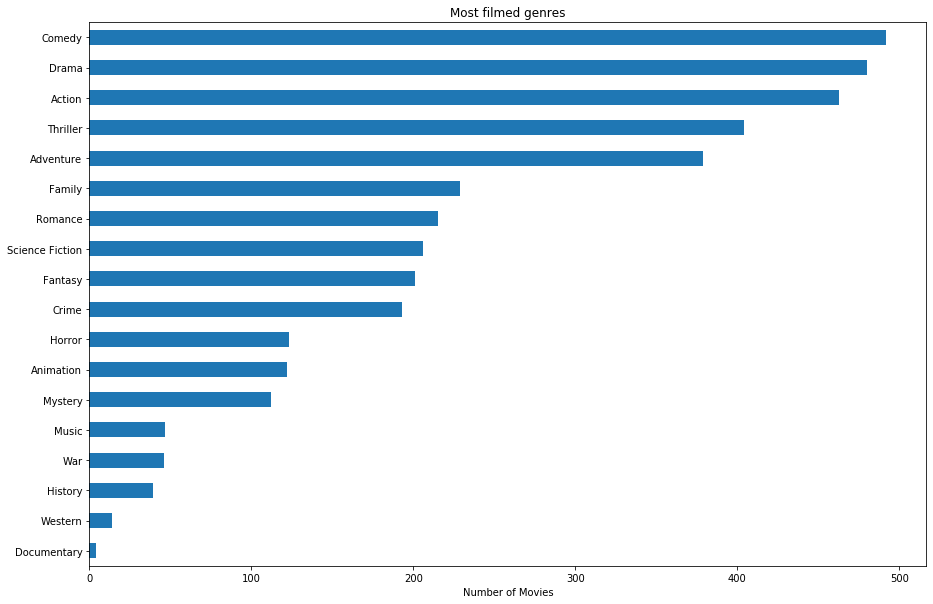

In [94]:
# Sorting the Genres in ascending Order and plotting the bar graph
genres.sort_values(ascending = True,inplace = True)
genres.plot(kind = 'barh',figsize = (15,10))
plt.title('Most filmed genres')
plt.xlabel('Number of Movies');

>#### B6. Production Companies

In [80]:
# Calling the function and storing the data in the variable
pd_cmp = value('production_companies')
# Top 20 Data
pd_cmp.head(20)

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
Walt Disney Pictures                       78
New Line Cinema                            67
Columbia Pictures Corporation              51
Relativity Media                           50
Touchstone Pictures                        46
DreamWorks SKG                             43
Metro-Goldwyn-Mayer (MGM)                  42
Amblin Entertainment                       40
Village Roadshow Pictures                  35
Dune Entertainment                         34
Regency Enterprises                        32
Fox 2000 Pictures                          26
TriStar Pictures                           25
DreamWorks Animation                       25
Legendary Pictures                         24
dtype: int64

In [81]:
# Top 5 Production Companies
pd_cmp.head(5)

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
dtype: int64

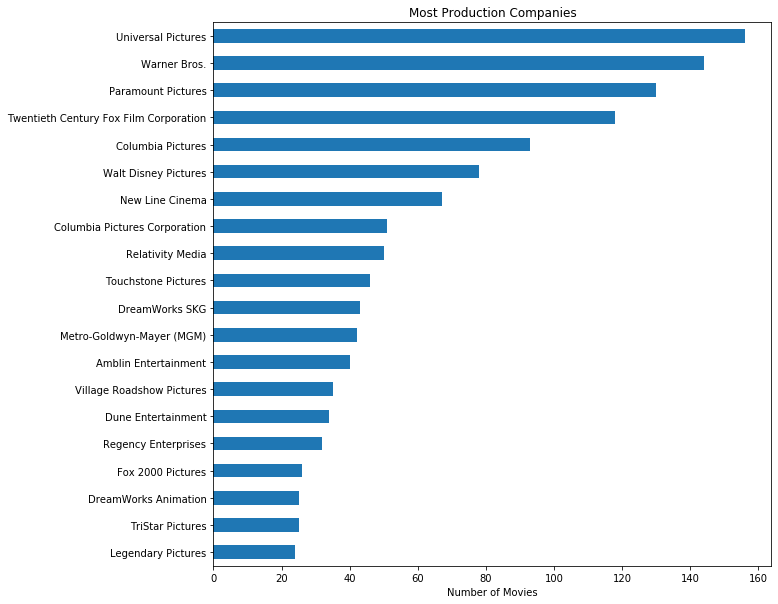

In [95]:
# Top 20 Production Companies
pd_cmp = pd_cmp.head(20)

# Sorting the values in ascending order and plotting the bar graph
pd_cmp.sort_values(ascending = True,inplace = True)
pd_cmp.plot(kind = 'barh',figsize = (10,10))
plt.title('Most Production Companies')
plt.xlabel('Number of Movies');

>#### B7. Revenue

In [83]:
# Calling the function
rev = avg('revenue(in $)')
print("The Average Revenue of Profitable Movie is: ${0:.1f}".format(rev))

The Average Revenue of Profitable Movie is: $251404908.8


<a id='conclusions'></a>
## Conclusions

From the above analysis,we can conclud that to have profitable/successful movies we should have:
> * Budget of minimum `$60 Million`.
> * Cast should be one or more of : Tom Cruise,Brad Pitt,Tom Hanks,Sylvester Stallone,Cameron Diaz.
> * Director should be any one or more of : Steven Spielberg,Robert Zemeckis,Clint Eastwood,Tim Burton,Tony Scott.
> * Runtime should be minimum of `113 Minutes` or `2 Hours`.
> * Generes should be one or more of :Comedy,Drama,Action,Thriller,Adventure
> * Production Companies should be one or more of :Universal Pictures,Warner Bros,Paramount Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures

By doing this,the revenue of should be around `$255 Million`.